In [100]:
import pandas as pd
import quandl as q
import yfinance as yf
import matplotlib.style as style
style.available
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.rcParams['font.family'] = "serif"


msft = yf.Ticker("MSFT")


In [41]:
# get stock info
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 163000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and de

In [43]:
msft_data = msft.history(period="max")

In [44]:
msft_data.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-11-30,214.100006,214.759995,210.839996,214.070007,33064800,0.0,0.0
2020-12-01,214.509995,217.320007,213.350006,216.210007,30931300,0.0,0.0
2020-12-02,214.880005,215.470001,212.800003,215.369995,23724500,0.0,0.0
2020-12-03,214.610001,216.380005,213.649994,214.240005,25120900,0.0,0.0
2020-12-04,214.220001,215.380005,213.179993,214.360001,24433900,0.0,0.0


In [45]:
msft_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8756 entries, 1986-03-13 to 2020-12-04
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          8756 non-null   float64
 1   High          8756 non-null   float64
 2   Low           8756 non-null   float64
 3   Close         8756 non-null   float64
 4   Volume        8756 non-null   int64  
 5   Dividends     8756 non-null   float64
 6   Stock Splits  8756 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 547.2 KB


In [46]:
msft_data.describe()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,8756.000000,8756.000000,8756.000000,8756.000000,8.756000e+03,8756.000000,8756.000000
mean,27.583898,27.877009,27.283183,27.589958,5.988472e+07,0.002251,0.001942
std,38.614837,39.017029,38.183632,38.622994,3.865079e+07,0.041335,0.060897
min,0.056367,0.058577,0.056367,0.057472,2.304000e+06,0.000000,0.000000
25%,2.392274,2.420872,2.367407,2.382327,3.602512e+07,0.000000,0.000000
50%,18.598229,18.797163,18.407303,18.576722,5.303560e+07,0.000000,0.000000
75%,26.415396,26.739019,26.161666,26.399563,7.367082e+07,0.000000,0.000000
max,228.671335,232.251952,226.756345,231.045105,1.031789e+09,3.080000,2.000000


In [47]:
# Import numpy package
import numpy as np


In [49]:
# assign `Adj Close` to `daily_close`
daily_close = msft_data[['Close']]
# returns as fractional change
daily_return = daily_close.pct_change()
# replacing NA values with 0
daily_return.fillna(0, inplace=True)
print(daily_return)


               Close
Date                
1986-03-13  0.000000
1986-03-14  0.035714
1986-03-17  0.017242
1986-03-18 -0.025424
1986-03-19 -0.017391
...              ...
2020-11-30 -0.005390
2020-12-01  0.009997
2020-12-02 -0.003885
2020-12-03 -0.005247
2020-12-04  0.000560

[8756 rows x 1 columns]


In [50]:
mdata = msft_data.resample('M').apply(lambda x: x[-1])

monthly_return = mdata.pct_change()
monthly_return

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-04-30,0.189189,0.198198,0.166667,0.172727,1.400447,NaN,NaN
1986-05-31,0.030303,0.067669,0.079365,0.085271,-0.123952,NaN,NaN
1986-06-30,-0.125000,-0.112676,-0.132353,-0.121428,1.303191,NaN,NaN
1986-07-31,-0.033614,-0.079365,-0.033898,-0.073171,-0.749192,NaN,NaN
...,...,...,...,...,...,...,...
2020-08-31,0.113252,0.117761,0.129854,0.102752,-0.438530,NaN,NaN
2020-09-30,-0.084890,-0.073109,-0.079221,-0.067397,0.173993,NaN,NaN
2020-10-31,-0.020363,-0.036277,-0.033504,-0.037370,0.093929,NaN,NaN


In [52]:
# assigning adjusted closing prices to 

adj_price = msft_data['Close']
adj_price

Date
1986-03-13      0.061893
1986-03-14      0.064103
1986-03-17      0.065209
1986-03-18      0.063551
1986-03-19      0.062446
                 ...    
2020-11-30    214.070007
2020-12-01    216.210007
2020-12-02    215.369995
2020-12-03    214.240005
2020-12-04    214.360001
Name: Close, Length: 8756, dtype: float64

In [53]:
# calculate the moving average
mav = adj_price.rolling(window=50).mean()


In [54]:
# print the result
print(mav[-10:])


Date
2020-11-20    210.888274
2020-11-23    210.993001
2020-11-24    211.105505
2020-11-25    211.292613
2020-11-27    211.549610
2020-11-30    211.833676
2020-12-01    212.117653
2020-12-02    212.287486
2020-12-03    212.570962
2020-12-04    212.804973
Name: Close, dtype: float64


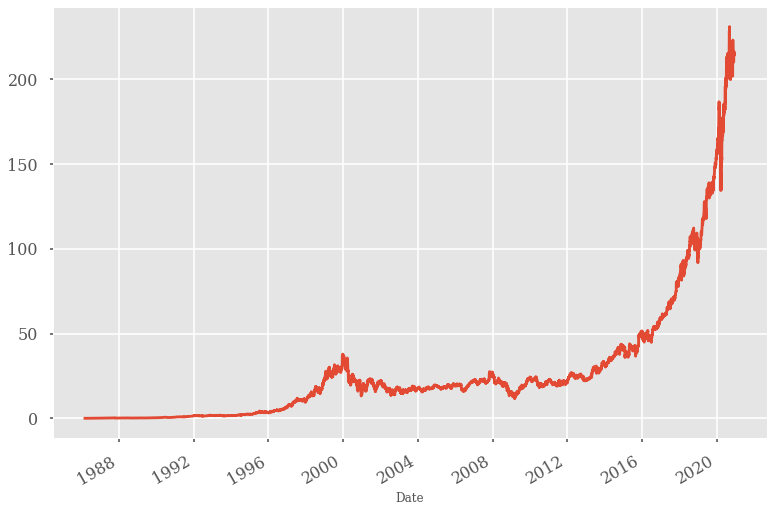

In [103]:
# import the matplotlib package to see the plot

import matplotlib.pyplot as plt

adj_price.plot()


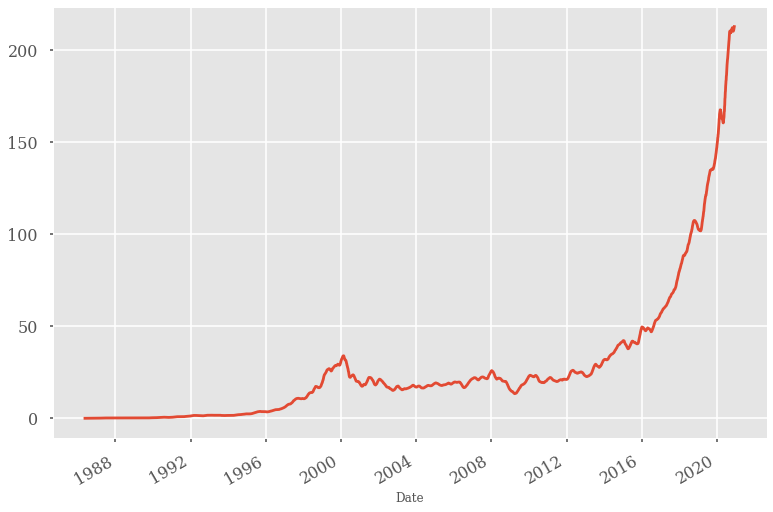

In [102]:
mav.plot()


In [57]:
# step1: initialize the short and long lookback periods

short_lb = 50
long_lb = 120


In [58]:
# step2: initialize a new DataFrame called signal_df with a signal column

signal_df = pd.DataFrame(index=msft_data.index)
signal_df['signal'] = 0.0


In [60]:
# step3: create a short simple moving average over the short lookback period
signal_df['short_mav'] = msft_data['Close'].rolling(window=short_lb,                                     min_periods=1, center=False).mean()


In [61]:
# step4: create long simple moving average over the long lookback period

signal_df['long_mav'] = msft_data['Close'].rolling(window=long_lb, min_periods=1, center=False).mean()


In [62]:
# step5: generate the signals based on the conditional statement

signal_df['signal'][short_lb:] = np.where(signal_df['short_mav'][short_lb:] > signal_df['long_mav'][short_lb:], 1.0, 0.0)   


In [63]:
# step6: create the trading orders based on the positions column

signal_df['positions'] = signal_df['signal'].diff()
signal_df[signal_df['positions'] == -1.0]


,signal,short_mav,long_mav,positions
Date,,,,
1986-08-13,0.0,0.066767,0.066786,-1.0
1987-08-20,0.0,0.221881,0.222361,-1.0
1987-12-09,0.0,0.235149,0.235320,-1.0
1988-05-31,0.0,0.248965,0.249124,-1.0
1988-09-07,0.0,0.256182,0.256478,-1.0
1989-05-05,0.0,0.233878,0.234779,-1.0
1990-09-11,0.0,0.581993,0.582752,-1.0
1992-05-28,0.0,1.562157,1.563751,-1.0
1993-02-26,0.0,1.720746,1.721406,-1.0


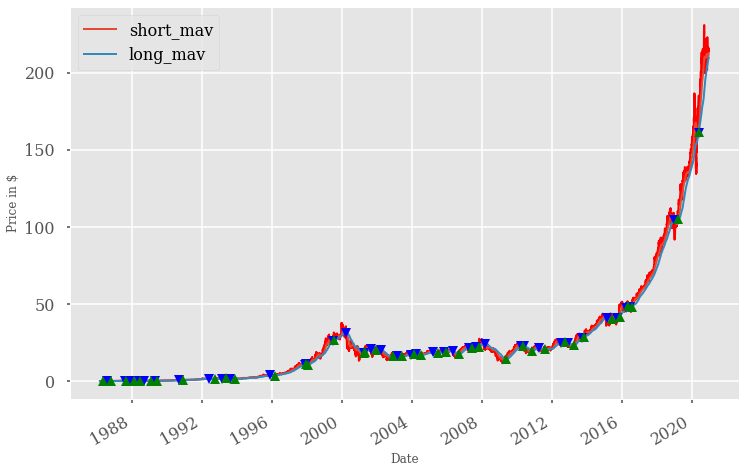

In [106]:
# initialize the plot using 
fig = plt.figure(figsize=(20,10))

# Add a subplot and label for y-axis
plt1 = fig.add_subplot(111,  ylabel='Price in $')
msft_data['Close'].plot(ax=plt1, color='r', lw=2.)

# plot the short and long lookback moving averages
signal_df[['short_mav', 'long_mav']].plot(ax=plt1, lw=2., figsize=(12,8))

# plotting the sell signals

plt1.plot(signal_df.loc[signal_df.positions == -1.0].index,signal_df.short_mav[signal_df.positions == -1.0],'v',markersize=10, color='b')

# plotting the buy signals

plt1.plot(signal_df.loc[signal_df.positions == 1.0].index,signal_df.short_mav[signal_df.positions == 1.0],'^', markersize=10, color='g')         
# Show the plotplt.show()

